<a href="https://colab.research.google.com/github/EAName/yelp-reviews/blob/main/Yelp_Linear_Regression_EE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive, files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


# Ingest Business Clean 5

In [ ]:
FILE = '/content/gdrive/MyDrive/yelp_dataset/yelp_business_clean_version5.csv'

In [ ]:
df = pd.read_csv( FILE )
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,market,RestaurantsTakeOut,HasTV,BusinessAcceptsCreditCards,BusinessParking,RestaurantsPriceRange2,RestaurantsReservations,AgesAllowed_21plus,AgesAllowed_allages,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid,garage,street,validated,lot,valet,Nightlife,Bars,American (Traditional),Pizza,American (New),Sandwiches,Italian,Breakfast & Brunch,Mexican,Seafood,ChineseTotal,Burgers,Salad,Chicken Wings,Sports Bars,JapaneseTotal
0,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123.0,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", 'RestaurantsAttire': ""u'casual'"", 'RestaurantsDelivery': 'False', 'RestaurantsTakeOut': 'True', 'HasTV': 'True', 'NoiseLevel': ""u'average'"", 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsPriceRange2': '1', 'GoodForKids': 'True', 'WiFi': ""u'free'"", 'RestaurantsReservations': 'False', 'RestaurantsGoodForGroups': 'True'}","Pubs, Restaurants, Italian, Bars, American (Traditional), Nightlife, Greek",St. Louis,1.0,1.0,1.0,"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",1.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227.0,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'GoodForKids': 'True', 'BikeParking': 'False', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"", 'RestaurantsGoodForGroups': 'True', 'OutdoorSeating': 'False', 'WiFi': ""u'no'"", 'Alcohol': ""'none'"", 'RestaurantsDelivery': 'True', 'BusinessParking': ""{'garage': None, 'street': False, 'validated': None, 'lot': True, 'valet': False}"", 'HasTV': 'True', 'Ambience': ""{'touristy': None, 'hipster': None, 'romantic': False, 'divey': None, 'intimate': None, 'trendy': None, 'upscale': None, 'classy': None, 'casual': True}""}","American (Traditional), Restaurants, Diners, Breakfast & Brunch",Indianapolis,1.0,1.0,1.0,"{'garage': None, 'street': False, 'validated': None, 'lot': True, 'valet': False}",1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,NaN,0.0,NaN,1.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsAttire': ""'casual'"", 'BusinessAcceptsCreditCards': 'True', 'WiFi': ""'free'"", 'HasTV': 'False', 'RestaurantsTakeOut': 'True', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}"", 'GoodForKids': 'False', 'GoodForMeal': ""{'dessert': True, 'latenight': None, 'lunch': None, 'dinner': True, 'brunch': None, 'breakfast': None}"", 'NoiseLevel': ""u'average'"", 'RestaurantsPriceRange2': '2', 'Alcohol': ""'full_bar'"", 'DogsAllowed': 'False', 'HappyHour': 'True', 'RestaurantsDelivery': 'True', 'WheelchairAccessible': 'True', 'OutdoorSeating': 'True', 'RestaurantsTableService': 'True', 'BusinessParking': ""{u'valet': False, 

In [ ]:
df.shape

(30930, 62)

# EDA Business Clean5 look at correlation, NA rows

In [ ]:
#drop unnecessary rows - using Edwin's list

#X = X.drop( ["stars","Unnamed: 0","Unnamed: 0.1","business_id","name","address","city","state","postal_code","latitude","longitude","attributes","categories","BusinessParking","market"], axis=1 

In [ ]:
df_eda1 = df.copy(deep = True)

In [ ]:
df_eda1.drop(["business_id","name","address","city","state","postal_code","latitude","longitude","attributes","categories","BusinessParking","market"], axis =1, inplace = True)

In [ ]:
df_eda1.shape

(30930, 50)

In [ ]:
#Look at NA

df_eda1.isna().any()

stars                         False
review_count                  False
is_open                       False
RestaurantsTakeOut            True 
HasTV                         True 
BusinessAcceptsCreditCards    True 
RestaurantsPriceRange2        True 
RestaurantsReservations       True 
AgesAllowed_21plus            False
AgesAllowed_allages           False
Alcohol_None                  False
Alcohol_beer_and_wine         False
Alcohol_full_bar              False
BYOBCorkage_no                False
BYOBCorkage_yes_corkage       False
BYOBCorkage_yes_free          False
NoiseLevel_average            False
NoiseLevel_loud               False
NoiseLevel_quiet              False
NoiseLevel_very_loud          False
RestaurantsAttire_casual      False
RestaurantsAttire_dressy      False
RestaurantsAttire_formal      False
Smoking_no                    False
Smoking_outdoor               False
Smoking_yes                   False
WiFi_free                     False
WiFi_no                     

In [ ]:
#check which variables make sense to create NA columns. variables with more than 5% NA = 1550 
#df_eda1.info()
df_eda1.isna().sum()

stars                         0   
review_count                  0   
is_open                       0   
RestaurantsTakeOut            1054
HasTV                         2122
BusinessAcceptsCreditCards    275 
RestaurantsPriceRange2        2026
RestaurantsReservations       1744
AgesAllowed_21plus            0   
AgesAllowed_allages           0   
Alcohol_None                  0   
Alcohol_beer_and_wine         0   
Alcohol_full_bar              0   
BYOBCorkage_no                0   
BYOBCorkage_yes_corkage       0   
BYOBCorkage_yes_free          0   
NoiseLevel_average            0   
NoiseLevel_loud               0   
NoiseLevel_quiet              0   
NoiseLevel_very_loud          0   
RestaurantsAttire_casual      0   
RestaurantsAttire_dressy      0   
RestaurantsAttire_formal      0   
Smoking_no                    0   
Smoking_outdoor               0   
Smoking_yes                   0   
WiFi_free                     0   
WiFi_no                       0   
WiFi_paid           

In [ ]:
df_eda1['HasTV_NA'] = df_eda1['HasTV']
df_eda1['RestaurantsPriceRange2_NA'] = df_eda1['RestaurantsPriceRange2']
df_eda1['RestaurantsReservations_NA'] = df_eda1['RestaurantsReservations']
df_eda1['garage_NA'] = df_eda1['garage']
df_eda1['street_NA'] = df_eda1['street']
df_eda1['validated_NA']=df_eda1['validated']
df_eda1['lot_NA'] = df_eda1['lot']
df_eda1['valet_NA']=df_eda1['valet']

In [ ]:
df_eda1.head()

,stars,review_count,is_open,RestaurantsTakeOut,HasTV,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsReservations,AgesAllowed_21plus,AgesAllowed_allages,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid,garage,street,validated,lot,valet,Nightlife,Bars,American (Traditional),Pizza,American (New),Sandwiches,Italian,Breakfast & Brunch,Mexican,Seafood,ChineseTotal,Burgers,Salad,Chicken Wings,Sports Bars,JapaneseTotal,HasTV_NA,RestaurantsPriceRange2_NA,RestaurantsReservations_NA,garage_NA,street_NA,validated_NA,lot_NA,valet_NA
0,3.0,19,0,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.5,28,1,1.0,1.0,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,NaN,0.0,NaN,1.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0
2,4.0,245,1,1.0,0.0,1.0,2.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,NaN,1.0,NaN,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,2.0,1.0,NaN,1.0,NaN,0.0,0.0
3,4.5,205,1,1.0,1.0,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.5,339,1,1.0,1.0,1.0,2.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_eda1.fillna({'RestaurantsTakeOut':0,
 'HasTV':0,
 'BusinessAcceptsCreditCards':0,
 'BusinessParking':0,
 'RestaurantsPriceRange2':0,
 'RestaurantsReservations':0,
 'garage': 0,
 'street':0,
 'validated':0,
 'lot':0,
 'valet':0
 },
 inplace=True)

In [ ]:
df_eda1.isna().sum()

stars                         0   
review_count                  0   
is_open                       0   
RestaurantsTakeOut            0   
HasTV                         0   
BusinessAcceptsCreditCards    0   
RestaurantsPriceRange2        0   
RestaurantsReservations       0   
AgesAllowed_21plus            0   
AgesAllowed_allages           0   
Alcohol_None                  0   
Alcohol_beer_and_wine         0   
Alcohol_full_bar              0   
BYOBCorkage_no                0   
BYOBCorkage_yes_corkage       0   
BYOBCorkage_yes_free          0   
NoiseLevel_average            0   
NoiseLevel_loud               0   
NoiseLevel_quiet              0   
NoiseLevel_very_loud          0   
RestaurantsAttire_casual      0   
RestaurantsAttire_dressy      0   
RestaurantsAttire_formal      0   
Smoking_no                    0   
Smoking_outdoor               0   
Smoking_yes                   0   
WiFi_free                     0   
WiFi_no                       0   
WiFi_paid           

In [ ]:
#for NA COLUMNS - CONVERT 1 TO 0, THEN FILLNA

df_eda1[['HasTV_NA', 'RestaurantsPriceRange2_NA', 'RestaurantsReservations_NA', 'garage_NA', 'street_NA','validated_NA', 'lot_NA', 'valet_NA']] = df_eda1[['HasTV_NA', 'RestaurantsPriceRange2_NA', 'RestaurantsReservations_NA', 'garage_NA', 'street_NA','validated_NA', 'lot_NA', 'valet_NA']].replace(1, 0)

In [ ]:
df_eda1['RestaurantsPriceRange2'].describe()

count    30930.000000
mean     1.606143    
std      0.695106    
min      0.000000    
25%      1.000000    
50%      2.000000    
75%      2.000000    
max      4.000000    
Name: RestaurantsPriceRange2, dtype: float64

In [ ]:
#fix RestaurantsPriceRange2_NA to convert 2, 3, 4 to 0
df_eda1[['RestaurantsPriceRange2_NA']] = df_eda1[['RestaurantsPriceRange2_NA']].replace(2, 0)
df_eda1[['RestaurantsPriceRange2_NA']] = df_eda1[['RestaurantsPriceRange2_NA']].replace(3, 0)
df_eda1[['RestaurantsPriceRange2_NA']] = df_eda1[['RestaurantsPriceRange2_NA']].replace(4, 0)

In [ ]:
df_eda1['RestaurantsPriceRange2_NA'].describe()

count    28904.0
mean     0.0    
std      0.0    
min      0.0    
25%      0.0    
50%      0.0    
75%      0.0    
max      0.0    
Name: RestaurantsPriceRange2_NA, dtype: float64

In [ ]:
df_eda1.head()

,stars,review_count,is_open,RestaurantsTakeOut,HasTV,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsReservations,AgesAllowed_21plus,AgesAllowed_allages,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid,garage,street,validated,lot,valet,Nightlife,Bars,American (Traditional),Pizza,American (New),Sandwiches,Italian,Breakfast & Brunch,Mexican,Seafood,ChineseTotal,Burgers,Salad,Chicken Wings,Sports Bars,JapaneseTotal,HasTV_NA,RestaurantsPriceRange2_NA,RestaurantsReservations_NA,garage_NA,street_NA,validated_NA,lot_NA,valet_NA
0,3.0,19,0,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.5,28,1,1.0,1.0,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,4.0,245,1,1.0,0.0,1.0,2.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4.5,205,1,1.0,1.0,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.5,339,1,1.0,1.0,1.0,2.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_eda1.fillna({'HasTV_NA':1,
 'RestaurantsPriceRange2_NA':1,
 'RestaurantsReservations_NA':1,
 'garage_NA': 1,
 'street_NA':1,
 'validated_NA':1,
 'lot_NA':1,
 'valet_NA':1
 },
 inplace=True)

In [ ]:
df_eda1.isna().sum()

stars                         0
review_count                  0
is_open                       0
RestaurantsTakeOut            0
HasTV                         0
BusinessAcceptsCreditCards    0
RestaurantsPriceRange2        0
RestaurantsReservations       0
AgesAllowed_21plus            0
AgesAllowed_allages           0
Alcohol_None                  0
Alcohol_beer_and_wine         0
Alcohol_full_bar              0
BYOBCorkage_no                0
BYOBCorkage_yes_corkage       0
BYOBCorkage_yes_free          0
NoiseLevel_average            0
NoiseLevel_loud               0
NoiseLevel_quiet              0
NoiseLevel_very_loud          0
RestaurantsAttire_casual      0
RestaurantsAttire_dressy      0
RestaurantsAttire_formal      0
Smoking_no                    0
Smoking_outdoor               0
Smoking_yes                   0
WiFi_free                     0
WiFi_no                       0
WiFi_paid                     0
garage                        0
street                        0
validate

In [ ]:
df_eda1.describe()

,stars,review_count,is_open,RestaurantsTakeOut,HasTV,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsReservations,AgesAllowed_21plus,AgesAllowed_allages,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid,garage,street,validated,lot,valet,Nightlife,Bars,American (Traditional),Pizza,American (New),Sandwiches,Italian,Breakfast & Brunch,Mexican,Seafood,ChineseTotal,Burgers,Salad,Chicken Wings,Sports Bars,JapaneseTotal,HasTV_NA,RestaurantsPriceRange2_NA,RestaurantsReservations_NA,garage_NA,street_NA,validated_NA,lot_NA,valet_NA
count,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.00000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000
mean,3.587650,112.821403,0.615616,0.923278,0.727190,0.960944,1.606143,0.383673,0.000356,0.001423,0.381733,0.144326,0.388070,0.020983,0.002910,0.015972,0.57087,0.056515,0.162431,0.019496,0.856191,0.020854,0.001164,0.054284,0.038991,0.004720,0.419819,0.395506,0.006175,0.048400,0.282477,0.013256,0.496217,0.030973,0.231975,0.223569,0.190333,0.165535,0.146492,0.130973,0.108503,0.100517,0.086971,0.085516,0.077886,0.072680,0.062981,0.051988,0.051697,0.064113,0.068607,0.065503,0.056385,0.090268,0.109505,0.092079,0.097026,0.061849
std,0.694823,217.585630,0.486457,0.266154,0.445411,0.193731,0.695106,0.486288,0.018855,0.037691,0.485819,0.351426,0.487318,0.143329,0.053865,0.125367,0.49496,0.230917,0.368852,0.138261,0.350901,0.142896,0.034097,0.226581,0.193577,0.068543,0.493537,0.488967,0.078341,0.214613,0.450211,0.114370,0.499994,0.173248,0.422100,0.416643,0.392570,0.371669,0.353605,0.337376,0.311020,0.300693,0.281796,0.279652,0.267996,0.259615,0.242933,0.222007,0.221419,0.244957,0.252788,0.247415,0.230668,0.286570,0.312277,0.289142,0.295997,0.240886
min,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,20.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,51.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
#correlation only with review_count since this is the only continuous variable
#low correlation = 0.16

print(df_eda1['stars'].corr(df_eda1['review_count']))

0.16324686521317794


In [ ]:
#create barplots with avg stars for the NAs

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
categorical_NA = ['HasTV_NA', 'RestaurantsPriceRange2_NA', 'RestaurantsReservations_NA', 'garage_NA', 'street_NA','validated_NA', 'lot_NA', 'valet_NA']


In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_NA, ax.flatten()):
  sns.barplot(x = variable, y = 'stars', data = df_eda1)
  for label in subplot.get_xticklabels():
        label.set_rotation(90)
  plt.show()

In [ ]:
import plotly.express as px

histfunc = "avg"
fig = px.histogram(df,
                   x=' Persistent EPS in the Last Four Seasons',
                   y="Bankrupt?",
                   histfunc=histfunc,
                   title=f"histfunc = {histfunc}")
fig.show()

In [ ]:
import plotly.express as px

#histfunc = "avg"
#px.histogram(df, x="total_bill", y="tip", histfunc='avg')

#fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_NA, ax.flatten()): 
  fig = px.histogram(df_eda1,
                   x=variable,
                   y="stars",
                   nbins = 2,
                   histfunc="avg",
                   title=f"histfunc = {histfunc}")
  fig.show()

Histograms show the averages as very close, better to look at the mean numbers directly

In [ ]:
#discrete variables only

column_names = ['is_open','RestaurantsTakeOut', 'HasTV',
       'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2',
       'RestaurantsReservations','AgesAllowed_21plus', 'AgesAllowed_allages',
       'Alcohol_None', 'Alcohol_beer_and_wine', 'Alcohol_full_bar',
       'BYOBCorkage_no', 'BYOBCorkage_yes_corkage', 'BYOBCorkage_yes_free',
       'NoiseLevel_average', 'NoiseLevel_loud', 'NoiseLevel_quiet',
       'NoiseLevel_very_loud', 'RestaurantsAttire_casual',
       'RestaurantsAttire_dressy', 'RestaurantsAttire_formal', 'Smoking_no',
       'Smoking_outdoor', 'Smoking_yes', 'WiFi_free', 'WiFi_no', 'WiFi_paid',
       'garage', 'street', 'validated', 'lot', 'Nightlife', 'Bars', 
       'American (Traditional)', 'Sandwiches', 'Italian', 'Breakfast & Brunch',
       'Mexican', 'Seafood', 'ChineseTotal', 'Burgers', 'Salad', 'Chicken Wings',
       'Sports Bars', 'JapaneseTotal', 'HasTV_NA', 'RestaurantsPriceRange2_NA',
       'RestaurantsReservations_NA', 'garage_NA', 'street_NA', 'validated_NA',
       'lot_NA', 'valet_NA']

In [ ]:
#use Rabia's business clean EDA charts on all categorical variables

for i in column_names:
#  print(i)
  print(df_eda1.groupby([i]).agg({'stars': ['mean', 'median', 'count']}))
  print('\n')

            stars              
             mean median  count
is_open                        
0        3.480823  3.5    11889
1        3.654351  4.0    19041


                       stars              
                        mean median  count
RestaurantsTakeOut                        
0.0                 3.671091  4.0    2373 
1.0                 3.580716  3.5    28557


          stars              
           mean median  count
HasTV                        
0.0    3.658331  4.0    8438 
1.0    3.561133  3.5    22492


                               stars              
                                mean median  count
BusinessAcceptsCreditCards                        
0.0                         3.829470  4.0    1208 
1.0                         3.577821  3.5    29722


                           stars              
                            mean median  count
RestaurantsPriceRange2                        
0.0                     3.982231  4.0    2026 
1.0                     

Columns to drop from models based on < 0.05 difference between mean stars:
Alcohol_None
BYOBCorkage_yes_free
NoiseLevel_average
NoiseLevel_quiet
Smoking_yes
WiFi_no
Lot
Nightlife
Bars
Sandwiches
Street_NA – convert the NA in street to 0

Leave in the other NAs due to larger mean differences in the avg star


# Ingest Business Clean 6 v2 before prepping df_linear

In [ ]:
FILE = '/content/gdrive/MyDrive/yelp_dataset/yelp_business_clean_version6.csv'

In [ ]:
df = pd.read_csv( FILE )
df.head()

To get final df_linear before running Linear Regression Model 1:
run the next 2 code blocks so that df_linear shape should have 48 columns

Then you can pass this into Linear Regression Model 1

# Prep df for linear model: drop columns, convert 'Street' NAs to 0

In [14]:
df_linear = df.copy(deep = True)

In [15]:
#Drop unnecessary columns and columns from EDA on mean star rating

df_linear.drop(["business_id","name","address","city","state","postal_code","latitude",
              "longitude","attributes","categories","BusinessParking","market",'Alcohol_None', 
              'BYOBCorkage_yes_free', 'NoiseLevel_average', 'NoiseLevel_quiet',
              'Smoking_yes', 'WiFi_no', 'Nightlife', 'Bars', 'Sandwiches'], axis =1, inplace = True)

In [16]:
df_linear.shape

(30930, 48)

In [ ]:
df_linear.head()

,stars,review_count,is_open,RestaurantsTakeOut,HasTV,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsReservations,AgesAllowed_21plus,AgesAllowed_allages,Alcohol_beer_and_wine,Alcohol_full_bar,BYOBCorkage_no,BYOBCorkage_yes_corkage,NoiseLevel_loud,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,WiFi_free,WiFi_paid,garage,street,validated,lot,valet,American (Traditional),Pizza,American (New),Italian,Breakfast & Brunch,Mexican,Seafood,ChineseTotal,Burgers,Salad,Chicken Wings,Sports Bars,JapaneseTotal
0,3.0,19,0,1.0,1.0,1.0,1.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,2.5,28,1,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,0.0,NaN,1.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,4.0,245,1,1.0,0.0,1.0,2.0,1.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,NaN,1.0,NaN,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4.5,205,1,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.5,339,1,1.0,1.0,1.0,2.0,1.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#add NA columns 
df_linear['HasTV_NA'] = df_linear['HasTV']
df_linear['RestaurantsPriceRange2_NA'] = df_linear['RestaurantsPriceRange2']
df_linear['RestaurantsReservations_NA'] = df_linear['RestaurantsReservations']
df_linear['garage_NA'] = df_linear['garage']
df_linear['validated_NA']=df_linear['validated']
df_linear['lot_NA'] = df_linear['lot']
df_linear['valet_NA']=df_linear['valet']

In [ ]:
df_linear.fillna({'RestaurantsTakeOut':0,
 'HasTV':0,
 'BusinessAcceptsCreditCards':0,
 'BusinessParking':0,
 'RestaurantsPriceRange2':0,
 'RestaurantsReservations':0,
 'garage': 0,
 'street':0,
 'validated':0,
 'lot':0,
 'valet':0
 },
 inplace=True)

In [ ]:
df_linear.isna().sum()

stars                         0   
review_count                  0   
is_open                       0   
RestaurantsTakeOut            0   
HasTV                         0   
BusinessAcceptsCreditCards    0   
RestaurantsPriceRange2        0   
RestaurantsReservations       0   
AgesAllowed_21plus            0   
AgesAllowed_allages           0   
Alcohol_beer_and_wine         0   
Alcohol_full_bar              0   
BYOBCorkage_no                0   
BYOBCorkage_yes_corkage       0   
NoiseLevel_loud               0   
NoiseLevel_very_loud          0   
RestaurantsAttire_casual      0   
RestaurantsAttire_dressy      0   
RestaurantsAttire_formal      0   
Smoking_no                    0   
Smoking_outdoor               0   
WiFi_free                     0   
WiFi_paid                     0   
garage                        0   
street                        0   
validated                     0   
lot                           0   
valet                         0   
American (Traditiona

In [ ]:
#for NA COLUMNS - CONVERT 1 TO 0, THEN FILLNA

df_linear[['HasTV_NA', 'RestaurantsPriceRange2_NA', 'RestaurantsReservations_NA', 'garage_NA','validated_NA', 'lot_NA', 'valet_NA']] = df_linear[['HasTV_NA', 'RestaurantsPriceRange2_NA', 'RestaurantsReservations_NA', 'garage_NA', 'validated_NA', 'lot_NA', 'valet_NA']].replace(1, 0)

In [ ]:
#fix RestaurantsPriceRange2_NA to convert 2, 3, 4 to 0
df_linear[['RestaurantsPriceRange2_NA']] = df_linear[['RestaurantsPriceRange2_NA']].replace(2, 0)
df_linear[['RestaurantsPriceRange2_NA']] = df_linear[['RestaurantsPriceRange2_NA']].replace(3, 0)
df_linear[['RestaurantsPriceRange2_NA']] = df_linear[['RestaurantsPriceRange2_NA']].replace(4, 0)

In [ ]:
df_linear['RestaurantsPriceRange2_NA'].describe()

count    28904.0
mean     0.0    
std      0.0    
min      0.0    
25%      0.0    
50%      0.0    
75%      0.0    
max      0.0    
Name: RestaurantsPriceRange2_NA, dtype: float64

In [ ]:
df_linear.fillna({'HasTV_NA':1,
 'RestaurantsPriceRange2_NA':1,
 'RestaurantsReservations_NA':1,
 'garage_NA': 1,
 'validated_NA':1,
 'lot_NA':1,
 'valet_NA':1
 },
 inplace=True)

In [ ]:
df_linear.isna().sum()

stars                         0
review_count                  0
is_open                       0
RestaurantsTakeOut            0
HasTV                         0
BusinessAcceptsCreditCards    0
RestaurantsPriceRange2        0
RestaurantsReservations       0
AgesAllowed_21plus            0
AgesAllowed_allages           0
Alcohol_beer_and_wine         0
Alcohol_full_bar              0
BYOBCorkage_no                0
BYOBCorkage_yes_corkage       0
NoiseLevel_loud               0
NoiseLevel_very_loud          0
RestaurantsAttire_casual      0
RestaurantsAttire_dressy      0
RestaurantsAttire_formal      0
Smoking_no                    0
Smoking_outdoor               0
WiFi_free                     0
WiFi_paid                     0
garage                        0
street                        0
validated                     0
lot                           0
valet                         0
American (Traditional)        0
Pizza                         0
American (New)                0
Italian 

In [ ]:
df_linear.describe()

,stars,review_count,is_open,RestaurantsTakeOut,HasTV,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsReservations,AgesAllowed_21plus,AgesAllowed_allages,Alcohol_beer_and_wine,Alcohol_full_bar,BYOBCorkage_no,BYOBCorkage_yes_corkage,NoiseLevel_loud,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,WiFi_free,WiFi_paid,garage,street,validated,lot,valet,American (Traditional),Pizza,American (New),Italian,Breakfast & Brunch,Mexican,Seafood,ChineseTotal,Burgers,Salad,Chicken Wings,Sports Bars,JapaneseTotal,HasTV_NA,RestaurantsPriceRange2_NA,RestaurantsReservations_NA,garage_NA,validated_NA,lot_NA,valet_NA
count,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000,30930.000000
mean,3.587650,112.821403,0.615616,0.923278,0.727190,0.960944,1.606143,0.383673,0.000356,0.001423,0.144326,0.388070,0.020983,0.002910,0.056515,0.019496,0.856191,0.020854,0.001164,0.054284,0.038991,0.419819,0.006175,0.048400,0.282477,0.013256,0.496217,0.030973,0.190333,0.165535,0.146492,0.108503,0.100517,0.086971,0.085516,0.077886,0.072680,0.062981,0.051988,0.051697,0.064113,0.068607,0.065503,0.056385,0.090268,0.092079,0.097026,0.061849
std,0.694823,217.585630,0.486457,0.266154,0.445411,0.193731,0.695106,0.486288,0.018855,0.037691,0.351426,0.487318,0.143329,0.053865,0.230917,0.138261,0.350901,0.142896,0.034097,0.226581,0.193577,0.493537,0.078341,0.214613,0.450211,0.114370,0.499994,0.173248,0.392570,0.371669,0.353605,0.311020,0.300693,0.281796,0.279652,0.267996,0.259615,0.242933,0.222007,0.221419,0.244957,0.252788,0.247415,0.230668,0.286570,0.289142,0.295997,0.240886
min,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,20.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,51.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,124.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7568.000000,1.000000,1.000000,1.000000,1

In [ ]:
df_linear.shape

(30930, 48)

Create separate df of df_linear to download to csv

In [ ]:
yelp_business_clean6 = df.copy(deep = True)

In [ ]:
#treat NAs, add NA columns

yelp_business_clean6['HasTV_NA'] = yelp_business_clean6['HasTV']
yelp_business_clean6['RestaurantsPriceRange2_NA'] = yelp_business_clean6['RestaurantsPriceRange2']
yelp_business_clean6['RestaurantsReservations_NA'] = yelp_business_clean6['RestaurantsReservations']
yelp_business_clean6['garage_NA'] = yelp_business_clean6['garage']
yelp_business_clean6['validated_NA']=yelp_business_clean6['validated']
yelp_business_clean6['lot_NA'] = yelp_business_clean6['lot']
yelp_business_clean6['valet_NA']=yelp_business_clean6['valet']


In [ ]:
yelp_business_clean6.fillna({'RestaurantsTakeOut':0,
 'HasTV':0,
 'BusinessAcceptsCreditCards':0,
 'BusinessParking':0,
 'RestaurantsPriceRange2':0,
 'RestaurantsReservations':0,
 'garage': 0,
 'street':0,
 'validated':0,
 'lot':0,
 'valet':0
 },
 inplace=True)

In [ ]:
#for NA COLUMNS - CONVERT 1 TO 0, THEN FILLNA

yelp_business_clean6[['HasTV_NA', 'RestaurantsPriceRange2_NA', 'RestaurantsReservations_NA', 'garage_NA','validated_NA', 'lot_NA', 'valet_NA']] = yelp_business_clean6[['HasTV_NA', 'RestaurantsPriceRange2_NA', 'RestaurantsReservations_NA', 'garage_NA', 'validated_NA', 'lot_NA', 'valet_NA']].replace(1, 0)

In [ ]:
#fix RestaurantsPriceRange2_NA to convert 2, 3, 4 to 0
yelp_business_clean6[['RestaurantsPriceRange2_NA']] = yelp_business_clean6[['RestaurantsPriceRange2_NA']].replace(2, 0)
yelp_business_clean6[['RestaurantsPriceRange2_NA']] = yelp_business_clean6[['RestaurantsPriceRange2_NA']].replace(3, 0)
yelp_business_clean6[['RestaurantsPriceRange2_NA']] = yelp_business_clean6[['RestaurantsPriceRange2_NA']].replace(4, 0)

In [ ]:
yelp_business_clean6['RestaurantsPriceRange2_NA'].describe()

count    28904.0
mean     0.0    
std      0.0    
min      0.0    
25%      0.0    
50%      0.0    
75%      0.0    
max      0.0    
Name: RestaurantsPriceRange2_NA, dtype: float64

In [ ]:
yelp_business_clean6.fillna({'HasTV_NA':1,
 'RestaurantsPriceRange2_NA':1,
 'RestaurantsReservations_NA':1,
 'garage_NA': 1,
 'validated_NA':1,
 'lot_NA':1,
 'valet_NA':1
 },
 inplace=True)

In [ ]:
yelp_business_clean6.isna().sum()

business_id                   0 
name                          0 
address                       22
city                          0 
state                         0 
postal_code                   1 
latitude                      0 
longitude                     0 
stars                         0 
review_count                  0 
is_open                       0 
attributes                    0 
categories                    0 
market                        0 
RestaurantsTakeOut            0 
HasTV                         0 
BusinessAcceptsCreditCards    0 
BusinessParking               0 
RestaurantsPriceRange2        0 
RestaurantsReservations       0 
AgesAllowed_21plus            0 
AgesAllowed_allages           0 
Alcohol_None                  0 
Alcohol_beer_and_wine         0 
Alcohol_full_bar              0 
BYOBCorkage_no                0 
BYOBCorkage_yes_corkage       0 
BYOBCorkage_yes_free          0 
NoiseLevel_average            0 
NoiseLevel_loud               0 
NoiseLevel

In [ ]:
yelp_business_clean6.shape

(30930, 69)

In [ ]:
#download to csv

yelp_business_clean6.to_csv('yelp_business_clean_version6.csv', index = False)
files.download('yelp_business_clean_version6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Check Multicollinearity VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#create df with just the x variables

df_linearx = df_linear.drop(columns = ['stars'])

In [ ]:
from statsmodels.tools.tools import add_constant

X = add_constant(df_linearx)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                         72.915579
review_count                  1.261540 
is_open                       1.211590 
RestaurantsTakeOut            1.123756 
HasTV                         1.445011 
BusinessAcceptsCreditCards    1.046597 
RestaurantsPriceRange2        2.563497 
RestaurantsReservations       1.456071 
AgesAllowed_21plus            1.006885 
AgesAllowed_allages           1.021372 
Alcohol_beer_and_wine         1.239660 
Alcohol_full_bar              2.048496 
BYOBCorkage_no                1.035859 
BYOBCorkage_yes_corkage       1.018766 
NoiseLevel_loud               1.059597 
NoiseLevel_very_loud          1.024168 
RestaurantsAttire_casual      2.218105 
RestaurantsAttire_dressy      1.491768 
RestaurantsAttire_formal      1.023605 
Smoking_no                    1.131248 
Smoking_outdoor               1.126026 
WiFi_free                     1.246614 
WiFi_paid                     1.013856 
garage                        1.152592 
street                        1.367486 


Highest multicollinearity = 4.42
Highest variables = garage_NA, validated_NA, valet_na
No VIF over 5, so ok to keep these in the model

# Linear Regression model

In [17]:
#Using statsmodels vs. sk learn to be able to look at variable significance

import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [ ]:
#split df into test and train
Xlinear = df_linear.drop(columns = ['stars'])
ylinear = df_linear['stars']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xlinear,ylinear, test_size = 0.2, random_state = 10)

In [ ]:
X_train.shape

(24744, 47)

In [ ]:
X_Train = X_train
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

print_model = model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:11:24   Log-Likelihood:                -23186.
No. Observations:               24744   AIC:                         4.647e+04
Df Residuals:                   24696   BIC:                         4.686e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Variables to drop based on p value >0.05 = coefficient is not significant: 

RestaurantsTakeout, 
BYOBCorkage_yes_corkage,
Restaurant_Attire_dressy,
WiFi_paid,
validated,
Italian,
Mexican,
Seafood,
Salad,
JapaneseTotal,
Garage_NA,
Validated_NA


# Linear Regression Model 2

In [18]:
df_linear2 = df_linear.copy(deep = True)

In [19]:
df_linear2 = df_linear2.drop(columns = ['RestaurantsTakeOut','BYOBCorkage_yes_corkage', 'RestaurantsAttire_dressy', 'WiFi_paid', 
                                        'validated', 'Italian', 'Mexican', 'Seafood', 'Salad', 'JapaneseTotal', 'garage_NA', 
                                        'validated_NA'])

In [20]:
df_linear2.shape

(30930, 36)

In [ ]:
#split df into test and train
Xlinear = df_linear2.drop(columns = ['stars'])
ylinear = df_linear2['stars']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xlinear,ylinear, test_size = 0.2, random_state = 10)

In [ ]:
#Linear Model 2

X_Train = X_train
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

print_model = model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:56:59   Log-Likelihood:                -23192.
No. Observations:               24744   AIC:                         4.646e+04
Df Residuals:                   24708   BIC:                         4.675e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Additional variables to drop due to p value > 0.5: American (New)


# Linear Regression Model 3

In [21]:
df_linear3 = df_linear2.copy(deep = True)

In [22]:
df_linear3.shape

(30930, 36)

In [23]:
df_linear3 = df_linear2.drop(columns = ['American (New)'])

In [24]:
#split df into test and train
Xlinear = df_linear3.drop(columns = ['stars'])
ylinear = df_linear3['stars']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xlinear,ylinear, test_size = 0.2, random_state = 10)

In [ ]:
#Linear Model 3

X_Train = X_train
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

print_model = model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     188.0
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:03:05   Log-Likelihood:                -23194.
No. Observations:               24744   AIC:                         4.646e+04
Df Residuals:                   24709   BIC:                         4.674e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Linear Regression Model 3 on Test

In [ ]:
X_test = X_test
X_test = sm.add_constant(X_test)

predictions = model.predict(X_test) 

#print_model = model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Run performance metrics on test, download csv with NA columns

In [ ]:
# Performance metrics: RMSE, MAE, r-squared, adjusted r-squared
from statsmodels.tools.eval_measures import rmse, meanabs

RMSE_linear = rmse(y_test, predictions)
MAE_linear = meanabs(y_test, predictions)
print("Linear Regression RMSE", RMSE_linear, "MAE_linear", MAE_linear)


Linear Regression RMSE 0.627214714039668 MAE_linear 0.4982459478256154


Linear Regression Model Performance stats on test data

* RMSE = 0.6272 
* MAE = 0.4982 
* R-squared = 0.206 
* Adjusted R-squared = 0.201 





In [ ]:
# r-SQUARED AND ADJUSTED R-SQUARED ON TEST


X_test = X_test
X_test = sm.add_constant(X_test)

model = sm.OLS(y_test, X_test).fit()
#predictions = model.predict(X_train) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     46.88
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          5.92e-277
Time:                        21:09:28   Log-Likelihood:                -5872.0
No. Observations:                6186   AIC:                         1.181e+04
Df Residuals:                    6151   BIC:                         1.205e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


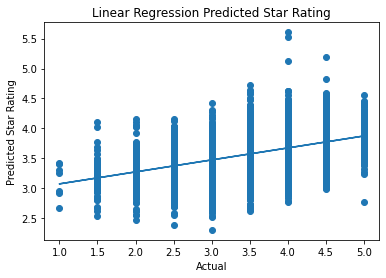

In [ ]:
#Linear Reg 5
#Actual vs Fitted
x = y_test
y = predictions


plt.scatter(x, y)
#plt.plot(range(5), range(5))

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)
plt.xlabel("Actual")
plt.ylabel("Predicted Star Rating")
plt.title("Linear Regression Predicted Star Rating")

plt.show()

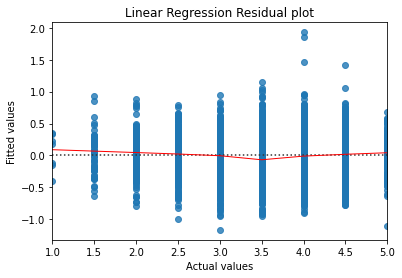

In [ ]:
# Residuals plot
sns.residplot(x=y_test, y=predictions, lowess = True, 
              line_kws={'color':'red', 'lw' :1, 'alpha' :1})

plt.ylabel("Fitted values")
plt.xlabel("Actual values")
plt.title("Linear Regression Residual plot")
plt.show()

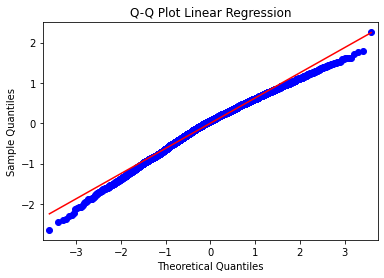

In [ ]:
# qqplot 
sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot Linear Regression")
plt.show()

High variance in the range of predictions, but the Q-Q plot is relatively  normal (predictions follow a normal distribution), so predictions do not have a skew. 

The scatter plot shows that linear regression has difficulty in predicting restaurants at both ends of the ratings scale: lower ratings (less than 2.5) and higher ratings (greater than 4.5). For these restaurants, the lowest prediction on test was 2.0, so no restaurant with a rating less than 2 was predicted accurately. For restaurants with an actual 5.0 rating, no restaurants were predicted accurately

# Test transforming y-values to log(y) on Linear Regression Model 1

In [26]:
#split df into test and train
Xlinear = df_linear.drop(columns = ['stars'])
ylinear = df_linear['stars']

In [28]:
# transform y values to log(y)

ylinear = np.log(ylinear)

In [29]:
ylinear[:5]

0    1.098612
1    0.916291
2    1.386294
3    1.504077
4    0.916291
Name: stars, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Xlinear,ylinear, test_size = 0.2, random_state = 10)

In [31]:
X_train.shape

(24744, 47)

In [32]:
X_Train = X_train
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     127.1
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:40:55   Log-Likelihood:                 5398.5
No. Observations:               24744   AIC:                        -1.070e+04
Df Residuals:                   24696   BIC:                        -1.031e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
#log transformation produces slightly lower constant (3.93) than the untransformed (4.04)

const = np.exp(1.3689)
print(const)

3.9310241897198743


In [34]:
# log model on X_test

# r-SQUARED AND ADJUSTED R-SQUARED ON TEST


X_test = X_test
X_test = sm.add_constant(X_test)

model = sm.OLS(y_test, X_test).fit()
#predictions = model.predict(X_train) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     32.21
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          1.40e-253
Time:                        18:47:34   Log-Likelihood:                 1290.3
No. Observations:                6186   AIC:                            -2485.
Df Residuals:                    6138   BIC:                            -2162.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Transforming y-value to log(y) produced a slightly lower R-squared than the original y-values: 

log(y) R-squared: 0.195
original y R-squared: 0.206